In [30]:
#importing necessary libraries
# %pip install kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [96]:
#creating a dataframe of out DataSet from Kaggle.com
df = pd.read_csv('Movie_Data.csv')

In [97]:
# viewing our dataset 
rows,col = df.shape[0],df.shape[1]
df.head() 
df.dropna(inplace = True)

In [113]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


(5421, 15)

In [99]:
# looking for missing values 
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

# Data Cleaning

In [100]:
# start by checking how much of our columns are empty
for cols in df.columns:
    pct_missing = np.mean(df[cols].isnull())
    print('{} - {}%'.format(cols,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [101]:
# checking the data types of our data frame
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [102]:
#changing data types
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [103]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [95]:
# #creating corrent year column using the released dat column 
# df['yearcorrect'] = df['released'].astype(str).str[:4]
# df

In [118]:
# just for fun, seeing which movies were TopFragger and BottonFragger (Valorant Lingo!)
df= df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [106]:
#displays all the rows and doesn't wrapt the rows 
pd.reset_option('max_rows')

In [107]:
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

# Correlation Hypothesis

In [108]:
#Budget hihg correlation
#company hight correlation
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

Text(0, 0.5, 'Gross')

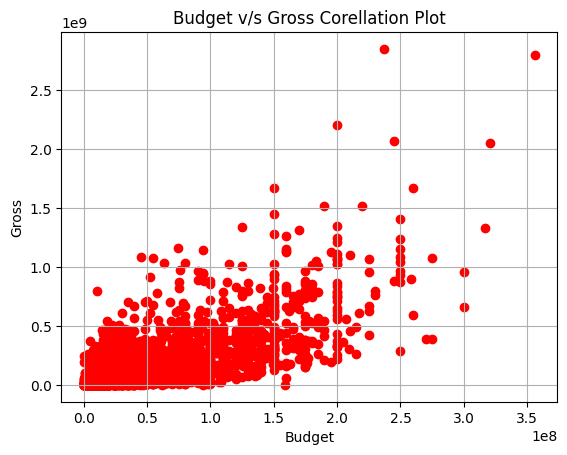

In [109]:
#scatter plot wiht budget and gross
plt.grid()
plt.scatter(x = df['budget'],y = df['gross'], color = 'r');
plt.title('Budget v/s Gross Corellation Plot')
plt.xlabel('Budget')
plt.ylabel('Gross')
# we hope to see some correlation so we sue RegPlot from Seaborn 

<Axes: xlabel='budget', ylabel='gross'>

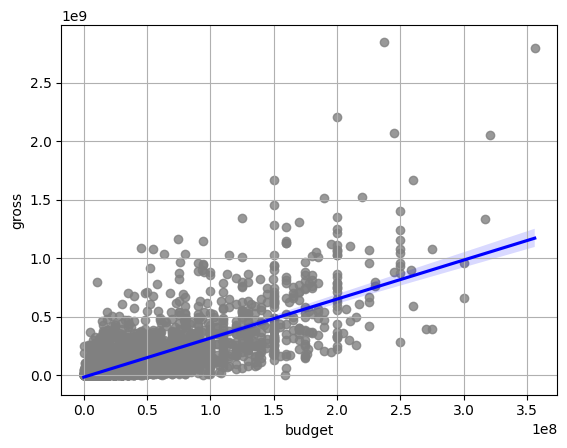

In [110]:
# Reg Plot 
plt.grid()
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color':'grey'},line_kws={'color':'blue'})

In [121]:
#even though the correlation works great but we can corellate the whole data frame if somehow we convert all the columsn to numeric type, now we are going to do the same



numerized_df = df.copy()  # Create a copy to avoid modifying the original

# Enumerate columns to get index and name
for i, col in enumerate(numerized_df.columns):
    # Check data type (avoid potential errors)
    if pd.api.types.is_string_dtype(numerized_df[col]):
        numerized_df[col] = numerized_df[col].astype('category')
        numerized_df[col] = numerized_df[col].cat.codes

In [122]:
numerized_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


In [123]:
df.head()
# comparing with the original datafram visually

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


Text(139.47222222222223, 0.5, 'Movie Feature')

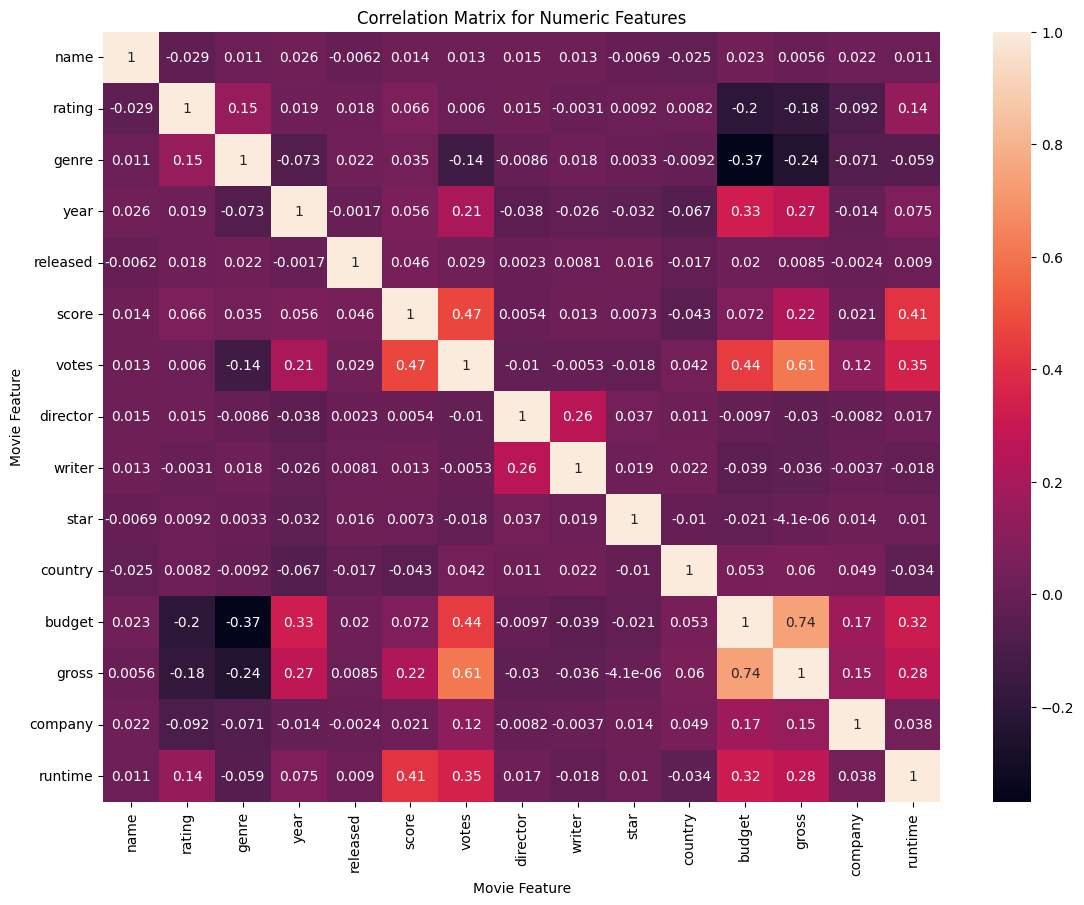

In [139]:
#Corellation Matrix for new DataFrame
corr_matrix = numerized_df.corr(method = 'pearson')
plt.figure(figsize=(13.5,10))
sns.heatmap(corr_matrix, annot = True);
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

In [144]:
#Unstacking 
correlation_matrix = numerized_df.corr()

corr_pairs = correlation_matrix.unstack() #something I discovered rigth now 
corr_pairs = corr_pairs.sort_values()
corr_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [148]:
# taking out high correlation pairs

high_corr = corr_pairs[(corr_pairs > 0.5) ]

high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and gross have the highest correlation and since Budget and Gross have a correlation so by vis-a-vis Votes and Budget have a correlation 
